In [1]:
!pwd

/run/media/user/DADOS/NLP/repositories/word_segmentation/notebooks


In [2]:
import pandas as pd
import string
import seaborn as sns

In [3]:
def load_df(path):
    df = pd.read_csv(path)

    patterns = [
        'boun',
        'glushkova_eng',
        'glushkova_rus',
        'stanford',
        'de_news'
    ]

    for item in patterns:
        df[item] = df['full_path'].str.contains(item)
    
    return df

In [4]:
def boun_patterns(df):
    patterns = [
        'small',
        'medium',
        'large',
        'xl',
        'translation/',
        'translation_heuristics/',
        'raw/depth_5',
        'raw/depth_13',
        'output/fine_tuning_13/',
        'output/fine_tuning/',
        'output/5_steps',
        'output/13_steps',
        'topk_1'
    ]

    for item in patterns:
        df[item] = df['full_path'].str.contains(item)
    return df

In [5]:
df = load_df('../results.csv')
df = boun_patterns(df)
for item in df.columns[6:]:
    df[item] = df[item].apply(lambda x: item if x else '')
df = df.rename(columns={
    "output/fine_tuning/": "output/fine_tuning_5/"
})
df['dataset'] = df['boun'] + df['stanford'] + df['glushkova_eng'] + df['glushkova_rus']
df['size'] = df['small'] + df['medium'] + df['large'] + df['xl']
df['mode'] = df['translation/'] + df['translation_heuristics/'] + df['output/fine_tuning_13/'] + df['output/fine_tuning_5/']
df['depth'] = df['raw/depth_5'] + df['raw/depth_13'] + df['output/5_steps'] + df['output/13_steps'] + df['output/fine_tuning_13/'] + df['output/fine_tuning_5/']
df['topk'] = df['topk_1']
df = df[['f1', 'precision', 'recall', 'dataset', 'size', 'mode', 'depth', 'topk', 'full_path']]
for item in df.columns[3:]:
    df[item] = df[item].str.strip()
    
df['depth'] = df['depth'].str.strip('_/' + string.ascii_letters)
df['depth'] = df['depth'].apply(lambda x: 5 if not x else x)
df['mode'] = df['mode'].apply(lambda x: 'raw' if not x else x)

tmp = df[df['dataset']=='boun']
mask = (tmp['mode'].str.contains('fine_tuning') & tmp['full_path'].str.contains('512')) | (~tmp['mode'].str.contains('fine_tuning'))
tmp = tmp[mask]
mask = ~tmp['mode'].str.contains('heuristics')
tmp = tmp[mask]

def rename_mode(x):
    rename = {
        "raw": "zero-shot ( Beamsearch )",
        "output/fine_tuning/": "fine-tuning ( Beamsearch )",
        "translation/": "fine-tuning ( Translation )"
    }
    return rename[x]

def rename_size(x):
    rename = {
        "small": 1,
        "medium": 2,
        "large": 3,
        "xl": 4
    }
    return rename[x]
tmp['mode'] = tmp['mode'].apply(rename_mode)
tmp['size'] = tmp['size'].apply(rename_size)
tmp['recall'] = tmp['recall'].astype(float)

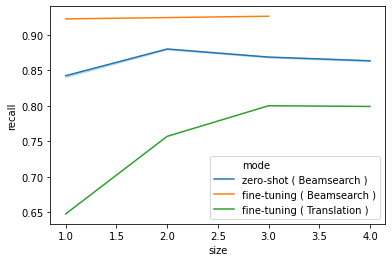

In [6]:
sns.lineplot(y='recall', x='size', hue='mode', data=tmp)

In [7]:
tmp

,f1,precision,recall,dataset,size,mode,depth,topk,full_path
3,0.875890,0.873924,0.879325,boun,2,zero-shot ( Beamsearch ),5,,./output/raw/depth_5/medium_test_boun/dict.json
4,0.878145,0.876863,0.880494,boun,2,zero-shot ( Beamsearch ),5,,./output/raw/depth_5/medium_test_boun/reranked...
5,0.837387,0.835273,0.840581,boun,1,zero-shot ( Beamsearch ),5,,./output/raw/depth_5/small_test_boun/dict.json
6,0.840536,0.838613,0.843587,boun,1,zero-shot ( Beamsearch ),5,,./output/raw/depth_5/small_test_boun/reranked_...
9,0.864772,0.862461,0.868103,boun,3,zero-shot ( Beamsearch ),5,,./output/raw/depth_5/large_test_boun/dict.json
20,0.878137,0.876882,0.880757,boun,2,zero-shot ( Beamsearch ),13,,./output/raw/depth_13/medium_test_boun/dict.json
21,0.841180,0.839997,0.843282,boun,1,zero-shot ( Beamsearch ),13,,./output/raw/depth_13/small_test_boun/dict.json
23,0.867194,0.865741,0.869534,boun,3,zero-shot ( Beamsearch ),13,,./output/raw/depth_13/large_test_boun/dict.json
48,0.862785,0.861757,0.864457,boun,4,zero-shot ( Beamsearch ),13,,./output/13_steps/xl_test_boun/dict.json
53,0.918792,0.916231,0.922593,boun,1,fine-tuning ( Beamsearch ),5,,./output/fine_tuning/512_small_test_boun/dict....


In [ ]:
timing = [
    {
        "dataset": "DE-news",
        "time": 10109.619864970911,
        "mode": "Beamsearch",
        "size": 1
        "steps": 8
    },
    {
        "dataset": "boun",
        "time": 1215.0927569726482,
        "mode": "Beamsearch",
        "size": 2
    },
    {
        "dataset": "boun",
        "time": 3009.581498868298,
        "mode": "Beamsearch",
        "size": 3
    },
    {
        "dataset": "boun",
        "time": 5646.910212764982,
        "mode": "Beamsearch",
        "size": 4
    },
    {
        "dataset": "boun",
        "time": 0,
        "mode": "Translation",
        "size": 0
    },
    {
        "dataset": "boun",
        "time": 0,
        "mode": "Translation",
        "size": 0
    },
    {
        "dataset": "boun",
        "time": 0,
        "mode": "Translation",
        "size": 0
    },
    {
        "dataset": "boun",
        "time": 0,
        "mode": "Translation",
        "size": 0
    }
]